In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def reload_img():
    return cv2.imread('../../data/ex5.jpg')

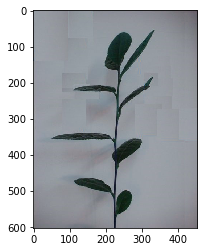

In [3]:
img = reload_img()

plt.imshow(img)
plt.show()

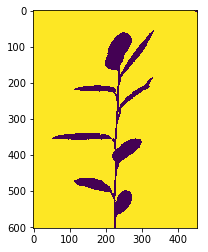

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

#cv2.imshow('thresh',thresh)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [5]:
#empty list to store template images
template_data=[]

threshold = 0.8
template_dir = '../../template/'
loc_lst = []
for filename in os.listdir(template_dir):
    template_img = cv2.imread(template_dir+filename)
    template_img_gray = cv2.cvtColor(template_img,cv2.COLOR_BGR2GRAY)
    w,h = template_img_gray.shape[::]
    
    res = cv2.matchTemplate(thresh, template_img_gray, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)
    #print(loc)
    #print('================================')
    for pt in zip(*loc[::-1]):
        loc_lst.append(pt)
        #cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0,255),2 )
        


In [6]:
threshold = 30

idx=0
final_loc_lst = []
final_loc_lst.append(loc_lst[0])

loc_lst.sort(key=lambda x: x[1], reverse=True)

if len(loc_lst)>1:
    while idx < (len(loc_lst)-1):
        try:
            diff0 = abs(loc_lst[idx+1][0] - loc_lst[idx][0])
            diff1 = abs(loc_lst[idx+1][1] - loc_lst[idx][1])
        except:
            print('err:',idx)
        if diff0 > threshold or  diff1 > threshold :
            final_loc_lst.append(loc_lst[idx+1])
        idx += 1

    #print(final_loc_lst)    
    print('=======================================================')
    if len(final_loc_lst) > 1:  
        final_loc_lst.sort(key=lambda x: x[0], reverse=True)
        final_loc_lst2 = []
        final_loc_lst2.append(final_loc_lst[0])
        idx = 0
    
        while idx < (len(final_loc_lst)-1):
            try:
                diff0 = abs(final_loc_lst[idx+1][0] - final_loc_lst[idx][0])
                diff1 = abs(final_loc_lst[idx+1][1] - final_loc_lst[idx][1])
            except:
                print('err:',idx)
            print(final_loc_lst[idx+1],' - ',final_loc_lst[idx], ' ', diff0, ' ', diff1,' ', (diff0 > threshold), ' ', diff1 > threshold, ' ', (diff0 > threshold or  diff1 > threshold ))
            if diff0 > threshold or  diff1 > threshold :
                final_loc_lst2.append(final_loc_lst[idx+1])
            idx += 1    
            

print(final_loc_lst2)

(315, 180)  -  (319, 50)   4   130   False   True   True
(295, 352)  -  (315, 180)   20   172   False   True   True
(284, 347)  -  (295, 352)   11   5   False   False   False
(284, 346)  -  (284, 347)   0   1   False   False   False
(283, 348)  -  (284, 346)   1   2   False   False   False
(207, 44)  -  (283, 348)   76   304   True   True   True
(190, 332)  -  (207, 44)   17   288   False   True   True
(107, 212)  -  (190, 332)   83   120   True   True   True
(106, 466)  -  (107, 212)   1   254   False   True   True
(104, 213)  -  (106, 466)   2   253   False   True   True
(49, 346)  -  (104, 213)   55   133   True   True   True
(45, 348)  -  (49, 346)   4   2   False   False   False
(45, 347)  -  (45, 348)   0   1   False   False   False
[(319, 50), (315, 180), (295, 352), (207, 44), (190, 332), (107, 212), (106, 466), (104, 213), (49, 346)]


No. of leaves = 9


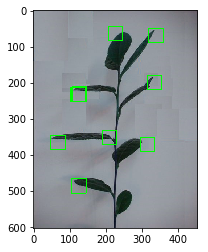

In [7]:
img = reload_img()

for pt in final_loc_lst2:
    cv2.rectangle(img, pt, (pt[0]+40, pt[1]+40), (0,255),2 )


print('No. of leaves =',len(final_loc_lst2))

plt.imshow(img)
plt.show()